In [1]:
import sys
sys.path.insert(1, '/Users/yiningliu/research/pooled-sampling/COVID-19-pooling') # set this to your directory

In [2]:
import numpy as np
from numpy import genfromtxt
import scipy.io
from test import recover_pool_results
from optimal_sizes import optimal_pool_size

In [3]:
# this is the membership matrix by Shental et al. 
# download the file from https://github.com/NoamShental/PBEST/blob/master/mFiles/poolingMatrix.mat 
matrix_file = scipy.io.loadmat('/Users/yiningliu/research/pooled-sampling/COVID-19-pooling/tests/data/shental-poolingMatrix.mat')
membership_matrix = matrix_file['poolingMatrix'] 

In [7]:
def compare_truth_and_estimates(membership_matrix, true_infection_vectors_file, fpr, fnr, f, verbose=False): 
    "get ground truth from true_infection_vectors_file and attempt to recover the ground truth." 
    xs = genfromtxt(true_infection_vectors_file, delimiter=',')
    result = {"xs": xs} 
    
    pool_results = np.sign(np.matmul(membership_matrix, xs)) 
    recovered_xs, recovered_false_ps, recovered_false_ns = recover_pool_results(membership_matrix, pool_results, fpr, fnr, f, verbose) 
    
    result["recovered_xs"] = recovered_xs 
    result["recovered_false_ps"] = recovered_false_ps 
    result["recovered_false_ns"] = recovered_false_ns 
    
    if not verbose: 
        print("=========================") 
    
    num_errors = (xs != recovered_xs).sum()
    num_fp = ((xs == 0) * (recovered_xs == 1)).sum() 
    num_fn = ((xs == 1) * (recovered_xs == 0)).sum() 
    accuracy = (xs == recovered_xs).sum() / xs.size 
    
    result["num_errors"] = (xs != recovered_xs).sum() 
    result["accuracy"] = accuracy
    
    if not verbose: 
        print("%s errors: %s false positive(s), %s false negative(s)" % (num_errors, num_fp, num_fn))
        print("accuracy: %.2f %%" % (accuracy * 100))
    
    return result

def check_ILP_optimality(xs, recovered_xs, verbose=False): 
    "This is only for noiseless data. For noisy measurement experiments, need to include ||f|| and ||n|| in the objective."
    _, num_trials = xs.shape
    for trial in range(100):
        x, recovered_x = xs[:, trial], recovered_xs[:, trial] 
        num_errors = (x != recovered_x).sum()
        if num_errors != 0 and not verbose: 
            Mx = np.sign(membership_matrix @ x) 
            Mxprime = np.sign(membership_matrix @ recovered_x)
            print("For trial %s, %s constraints not satisfied." % (trial, sum(Mx != Mxprime)))
            print("||x|| = %s >= ||recovered_x||? %s" % (sum(x), sum(x) >= sum(recovered_x))) 
        elif num_errors != 0 and sum(x) < sum(recovered_x):
            print("ILP solver fails to find the optimize the objective for trail %s" % trail)

# Test Result for f = 1/384

In [5]:
fpr, fnr, f = 0, 0, 1/384 
file1 = '/Users/yiningliu/research/pooled-sampling/COVID-19-pooling/tests/data/x-f-1-384.csv' 
result = compare_truth_and_estimates(membership_matrix, file1, fpr, fnr, f)
xs = result['xs']
recovered_xs = result['recovered_xs']
recovered_false_ps = result['recovered_false_ps']
recovered_false_ns = result['recovered_false_ns']
check_ILP_optimality(xs, recovered_xs)

Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 ...
Starting trail 50 ...
Starting trail 60 ...
Starting trail 70 ...
Starting trail 80 ...
Starting trail 90 ...
0 errors: 0 false positive(s), 0 false negative(s)
accuracy: 100.00 %


# Test Result for f = 2/384

In [38]:
fpr, fnr, f = 0, 0, 2/384 
file2 = '/Users/yiningliu/research/pooled-sampling/COVID-19-pooling/tests/data/x-f-2-384.csv' 
result = compare_truth_and_estimates(membership_matrix, file2, fpr, fnr, f)
xs = result['xs']
recovered_xs = result['recovered_xs']
recovered_false_ps = result['recovered_false_ps']
recovered_false_ns = result['recovered_false_ns']
check_ILP_optimality(xs, recovered_xs)

Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 ...
Starting trail 50 ...
Starting trail 60 ...
Starting trail 70 ...
Starting trail 80 ...
Starting trail 90 ...
1 errors: 0 false positive(s), 1 false negative(s)
accuracy: 100.00 %
For trial 98, 6 constraints not satisfied.
||x|| = 6.0 >= ||recovered_x||? True


In [44]:
xs[:, 98].sum(), recovered_xs[:, 98].sum()

(6.0, 5.0)

In [9]:
recovered_false_ps.sum(), recovered_false_ns.sum() # should be zeros

(0.0, 0.0)

# Test Result for f = 3/384

In [8]:
fpr, fnr, f = 0, 0, 3/384 
file3 = '/Users/yiningliu/research/pooled-sampling/COVID-19-pooling/tests/data/x-f-3-384.csv' 
result = compare_truth_and_estimates(membership_matrix, file3, fpr, fnr, f)
xs = result['xs']
recovered_xs = result['recovered_xs']
recovered_false_ps = result['recovered_false_ps']
recovered_false_ns = result['recovered_false_ns']
check_ILP_optimality(xs, recovered_xs)

Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 ...
Starting trail 50 ...
Starting trail 60 ...
Starting trail 70 ...
Starting trail 80 ...
Starting trail 90 ...
33 errors: 15 false positive(s), 18 false negative(s)
accuracy: 99.91 %
||x|| = 5.0 >= ||recovered_x||? True
||x|| = 7.0 >= ||recovered_x||? True
||x|| = 6.0 >= ||recovered_x||? True
||x|| = 8.0 >= ||recovered_x||? True
||x|| = 8.0 >= ||recovered_x||? True
||x|| = 7.0 >= ||recovered_x||? True
||x|| = 7.0 >= ||recovered_x||? True


In [11]:
recovered_false_ps.sum(), recovered_false_ns.sum() # should be zeros

(0.0, 0.0)

# Test Result for f = 4/384

In [9]:
fpr, fnr, f = 0, 0, 4/384 
file4 = '/Users/yiningliu/research/pooled-sampling/COVID-19-pooling/tests/data/x-f-4-384.csv' 
result = compare_truth_and_estimates(membership_matrix, file4, fpr, fnr, f)
xs = result['xs']
recovered_xs = result['recovered_xs']
recovered_false_ps = result['recovered_false_ps']
recovered_false_ns = result['recovered_false_ns']
check_ILP_optimality(xs, recovered_xs)

Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...
Starting trail 30 ...
Starting trail 40 ...
Starting trail 50 ...
Starting trail 60 ...
Starting trail 70 ...
Starting trail 80 ...
Starting trail 90 ...
151 errors: 65 false positive(s), 86 false negative(s)
accuracy: 99.61 %
||x|| = 8.0 >= ||recovered_x||? True
||x|| = 7.0 >= ||recovered_x||? True
||x|| = 10.0 >= ||recovered_x||? True
||x|| = 10.0 >= ||recovered_x||? True
||x|| = 6.0 >= ||recovered_x||? True
||x|| = 7.0 >= ||recovered_x||? True
||x|| = 8.0 >= ||recovered_x||? True
||x|| = 6.0 >= ||recovered_x||? True
||x|| = 10.0 >= ||recovered_x||? True
||x|| = 5.0 >= ||recovered_x||? True
||x|| = 7.0 >= ||recovered_x||? True
||x|| = 7.0 >= ||recovered_x||? True
||x|| = 7.0 >= ||recovered_x||? True
||x|| = 7.0 >= ||recovered_x||? True
||x|| = 8.0 >= ||recovered_x||? True
||x|| = 11.0 >= ||recovered_x||? True
||x|| = 7.0 >= ||recovered_x||? True
||x|| = 9.0 >= ||recovered_x||? True


In [13]:
recovered_false_ps.sum(), recovered_false_ns.sum() # should be zeros

(0.0, 0.0)

# Test Result for f = 5/384

In [ ]:
fpr, fnr, f = 0, 0, 5/384 
file5 = '/Users/yiningliu/research/pooled-sampling/COVID-19-pooling/tests/data/x-f-5-384.csv' 
result = compare_truth_and_estimates(membership_matrix, file5, fpr, fnr, f)
xs = result['xs']
recovered_xs = result['recovered_xs']
recovered_false_ps = result['recovered_false_ps']
recovered_false_ns = result['recovered_false_ns']
check_ILP_optimality(xs, recovered_xs)

Starting trail 0 ...
Starting trail 10 ...
Starting trail 20 ...


In [16]:
recovered_false_ps.sum(), recovered_false_ns.sum() # should be zeros

(0.0, 0.0)

### Check incorrect recovery of four positives 

In [27]:
for trial in range(100):
        x, recovered_x = xs[:, trial], recovered_xs[:, trial] 
        if (x != recovered_x).any() and x.sum() < 5: 
            print(trial)
            
            break

19


In [20]:
x.sum()

4.0

In [21]:
recovered_x.sum()

4.0

In [28]:
(Mx == Mxprime)

array([False,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True])

# Test using Random Measurement Matrix with row weight = 48
Randomly choose 48 nonzero entries for each row. 

In [22]:
def generate_const_row_weight_random_M(m, shape):
    """m is the row weight."""
    random_membership_matrix = np.zeros(shape)
    num_pools, num_samples = random_membership_matrix.shape
    for i in range(num_pools):
        indices = np.random.choice(num_samples, m, replace=False)
        for index in indices:
            random_membership_matrix[i, index] = 1 
    return random_membership_matrix

In [33]:
def test_random_M(m, k, n, T, num_trails, print_every=5): 
    """
    m: constant row weight
    k: expected number of positives among 384 samples
    n: number of samples
    T: number of tests 
    num_trails: test num_trails random membership matrices
    
    returns: average accuracy 
    """
    fpr, fnr, f = 0, 0, k/384
    file = '/Users/yiningliu/research/pooled-sampling/COVID-19-pooling/tests/data/x-f-%s-384.csv' % k 
    num_errors = []
    for i in range(num_trails): 
        if i % print_every == 0:
            print("Starting trail %s" % i) 
        matrix = generate_const_row_weight_random_M(m, shape=(T, n))
        result = compare_truth_and_estimates(matrix, file, fpr, fnr, f, verbose=True)
        num_errors.append(result['num_errors']) 
        check_ILP_optimality(result['xs'], result['recovered_xs'], verbose=True)
    average_errors = np.average(num_errors)
    
    print("======================")  
    print("Below is the test result for constant row weight = %s, infection rate %s/384" % (m, k)) 
    print("The result is based on %s simulations." % num_trails) 
    print("Average number of total errors: %s" % average_errors)
    print("======================") 
    # print("Average Accuracy: %.2f %%" % (average_errors /  * 100))
    # return average_errors 
    return average_errors

# Test Result for f = 1/384, 2/384, 3/384, 4/384, 5/384

In [32]:
test_random_M(48, 1, 10) 

Starting trail 0
Starting trail 5
Below is the test result for constant row weight = 48, infection rate 1/384
The result is based on 10 simulations.
Average Accuracy: 99.99 %


In [33]:
test_random_M(48, 2, 10) 

Starting trail 0
Starting trail 5
Below is the test result for constant row weight = 48, infection rate 2/384
The result is based on 10 simulations.
Average Accuracy: 99.97 %


In [34]:
test_random_M(48, 3, 10) 

Starting trail 0
Starting trail 5
Below is the test result for constant row weight = 48, infection rate 3/384
The result is based on 10 simulations.
Average Accuracy: 99.85 %


In [35]:
test_random_M(48, 4, 10) 

Starting trail 0
Starting trail 5
Below is the test result for constant row weight = 48, infection rate 4/384
The result is based on 10 simulations.
Average Accuracy: 99.60 %


In [36]:
test_random_M(48, 5, 10, print_every=1) 

Starting trail 0
Starting trail 1
Starting trail 2
Starting trail 3
Starting trail 4
Starting trail 5
Starting trail 6
Starting trail 7
Starting trail 8
Starting trail 9
Below is the test result for constant row weight = 48, infection rate 5/384
The result is based on 10 simulations.
Average Accuracy: 99.38 %


# Test using Random Measurement Matrix with various row weight for f = 5/384

In [12]:
optimal_pool_size(f=5/384, fnr=0, fpr=0)

52.88637282657267

In [15]:
row_weights = [40 + 2 * i for i in range(10)]

In [16]:
row_weights

[40, 42, 44, 46, 48, 50, 52, 54, 56, 58]

In [35]:
average_errors = []
for row_weight in row_weights:
    average_errors.append(test_random_M(m=row_weight, k=5, n=384, T=48, num_trails=10, print_every=1)) 

Starting trail 0
Starting trail 1
Starting trail 2
Starting trail 3
Starting trail 4
Starting trail 5
Starting trail 6
Starting trail 7
Starting trail 8
Starting trail 9
Below is the test result for constant row weight = 40, infection rate 5/384
The result is based on 10 simulations.
Average number of total errors: 224.0
Starting trail 0
Starting trail 1
Starting trail 2
Starting trail 3
Starting trail 4
Starting trail 5
Starting trail 6
Starting trail 7
Starting trail 8
Starting trail 9
Below is the test result for constant row weight = 42, infection rate 5/384
The result is based on 10 simulations.
Average number of total errors: 229.5
Starting trail 0
Starting trail 1
Starting trail 2
Starting trail 3
Starting trail 4
Starting trail 5
Starting trail 6
Starting trail 7
Starting trail 8
Starting trail 9
Below is the test result for constant row weight = 44, infection rate 5/384
The result is based on 10 simulations.
Average number of total errors: 238.1
Starting trail 0
Starting trail

In [36]:
average_errors

[224.0, 229.5, 238.1, 244.0, 261.4, 250.0, 255.6, 258.0, 280.9, 284.5]

In [37]:
import matplotlib.pyplot as plt

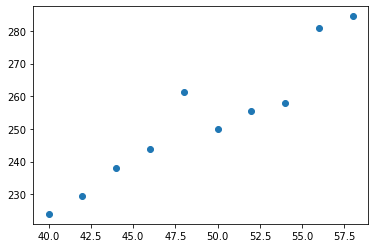

In [38]:
plt.scatter(row_weights, average_errors)

# Experiment with a wider range of row weights 

In [43]:
row_weights = [i for i in range(1, 61)]

In [45]:
average_errors = []
for row_weight in row_weights:
    average_errors.append(test_random_M(m=row_weight, k=5, n=384, T=48, num_trails=50, print_every=10)) 

Starting trail 0
Starting trail 10
Starting trail 20
Starting trail 30
Starting trail 40
Below is the test result for constant row weight = 1, infection rate 5/384
The result is based on 50 simulations.
Average number of total errors: 462.14
Starting trail 0
Starting trail 10
Starting trail 20
Starting trail 30
Starting trail 40
Below is the test result for constant row weight = 2, infection rate 5/384
The result is based on 50 simulations.
Average number of total errors: 487.74
Starting trail 0
Starting trail 10
Starting trail 20
Starting trail 30
Starting trail 40
Below is the test result for constant row weight = 3, infection rate 5/384
The result is based on 50 simulations.
Average number of total errors: 500.64
Starting trail 0
Starting trail 10
Starting trail 20
Starting trail 30
Starting trail 40
Below is the test result for constant row weight = 4, infection rate 5/384
The result is based on 50 simulations.
Average number of total errors: 515.18
Starting trail 0
Starting trail 

Starting trail 10
Starting trail 20
Starting trail 30
Starting trail 40
Below is the test result for constant row weight = 30, infection rate 5/384
The result is based on 50 simulations.
Average number of total errors: 250.04
Starting trail 0
Starting trail 10
Starting trail 20
Starting trail 30
Starting trail 40
Below is the test result for constant row weight = 31, infection rate 5/384
The result is based on 50 simulations.
Average number of total errors: 243.44
Starting trail 0
Starting trail 10
Starting trail 20
Starting trail 30
Starting trail 40
Below is the test result for constant row weight = 32, infection rate 5/384
The result is based on 50 simulations.
Average number of total errors: 237.16
Starting trail 0
Starting trail 10
Starting trail 20
Starting trail 30
Starting trail 40
Below is the test result for constant row weight = 33, infection rate 5/384
The result is based on 50 simulations.
Average number of total errors: 236.78
Starting trail 0
Starting trail 10
Starting t

Starting trail 10
Starting trail 20
Starting trail 30
Starting trail 40
Below is the test result for constant row weight = 59, infection rate 5/384
The result is based on 50 simulations.
Average number of total errors: 289.4
Starting trail 0
Starting trail 10
Starting trail 20
Starting trail 30
Starting trail 40
Below is the test result for constant row weight = 60, infection rate 5/384
The result is based on 50 simulations.
Average number of total errors: 293.18


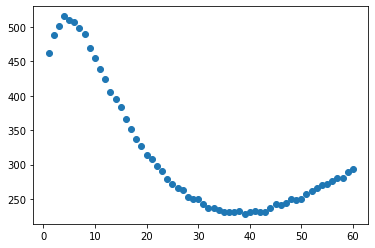

In [46]:
plt.scatter(row_weights, average_errors)

In [55]:
print("Optimal row weight is %s" % average_errors.index(np.min(average_errors)))

Optimal row weight is 38
